In [1]:
import pandas as pd
import numpy as np
f=pd.read_csv('titanic_data.csv')
f=f.dropna()
f = pd.concat([f,pd.get_dummies(f['Sex'], prefix='Sex',
                                 dummy_na=True)],axis=1).drop(['Sex'],axis=1)
print(f.shape)
f.head()

(183, 14)


,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_female,Sex_male,Sex_nan
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,C,1,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,S,1,0,0
6,7,0,1,"McCarthy, Mr. Timothy J",54.0,0,0,17463,51.8625,E46,S,0,1,0
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",4.0,1,1,PP 9549,16.7000,G6,S,1,0,0
11,12,1,1,"Bonnell, Miss. Elizabeth",58.0,0,0,113783,26.5500,C103,S,1,0,0


In [2]:
X = f[['Pclass','Fare','Sex_female','Sex_male','Age','SibSp','Parch']]
y = f['Survived']
print(X.shape , y.shape)
X.head()

(183, 7) (183,)


,Pclass,Fare,Sex_female,Sex_male,Age,SibSp,Parch
1,1,71.2833,1,0,38.0,1,0
3,1,53.1000,1,0,35.0,1,0
6,1,51.8625,0,1,54.0,0,0
10,3,16.7000,1,0,4.0,1,1
11,1,26.5500,1,0,58.0,0,0


In [3]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
X = scale.fit_transform(X)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [4]:
from sklearn.model_selection import GridSearchCV
from sklearn import svm
parameters = { 'C':np.arange(1,11,0.5)}
svc = svm.SVC()
SVM=GridSearchCV(svc, parameters)
SVM.fit(X_train,y_train)
SVM.best_estimator_

C:\Users\Admistrator\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\Admistrator\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Admistrator\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Admistrator\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma

SVC(C=4.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [5]:
pred = SVM.predict(X_test)

In [6]:
import sklearn.metrics as sklm
%matplotlib inline
import matplotlib.pyplot as plt

def print_metrics_3(label, predict):
    
    conf = sklm.confusion_matrix(label, predict)
    print('                 Confusion matrix')
    print('                 Survie           Die   ')
    print('Survie      %6d' % conf[0,0] + '            %5d' % conf[0,1] )
    print('Die          %6d' % conf[1,0] + '            %5d' % conf[1,1] )
    plt.imshow(conf)
    
    metrics = sklm.precision_recall_fscore_support(label, predict)

    print('                   Survie           Die   ')
    print('Num case   %0.2f' % metrics[3][0] + '     %0.2f' % metrics[3][1] )
    print('Precision   %0.2f' % metrics[0][0] + '      %0.2f' % metrics[0][1] )
    print('Recall      %0.2f' % metrics[1][0] + '      %0.2f' % metrics[1][1])
    print('F1          %0.2f' % metrics[2][0] + '      %0.2f' % metrics[2][1])
    
    acc = sklm.accuracy_score(label, predict)
    print('Accuracy ',acc)

                 Confusion matrix
                 Survie           Die   
Survie          18                5
Die              12               26
                   Survie           Die   
Num case   23.00     38.00
Precision   0.60      0.84
Recall      0.78      0.68
F1          0.68      0.75
Accuracy  0.7213114754098361


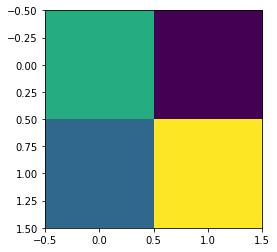

In [7]:
print_metrics_3(y_test,pred)

In [8]:
svc

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [9]:
SVM.best_estimator_

SVC(C=4.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

                 Confusion matrix
                 Survie           Die   
Survie          18                5
Die              11               27
                   Survie           Die   
Num case   23.00     38.00
Precision   0.62      0.84
Recall      0.78      0.71
F1          0.69      0.77
Accuracy  0.7377049180327869


C:\Users\Admistrator\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


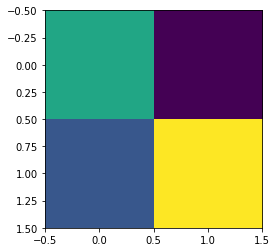

In [18]:
svc = svm.SVC(C=1)
svc.fit(X_train,y_train)
pred = svc.predict(X_test)
print_metrics_3(y_test,pred)